In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
from sklearn.datasets import load_boston
dataset1=load_boston()
type(dataset1)

sklearn.utils.Bunch

In [60]:
print(dataset1.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [61]:
dataset1.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [62]:
data_boston=pd.DataFrame(dataset1.data,columns=dataset1.feature_names)
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
data_boston['price']=dataset1.target

In [64]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
data_boston.shape

(506, 14)

In [66]:
data_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

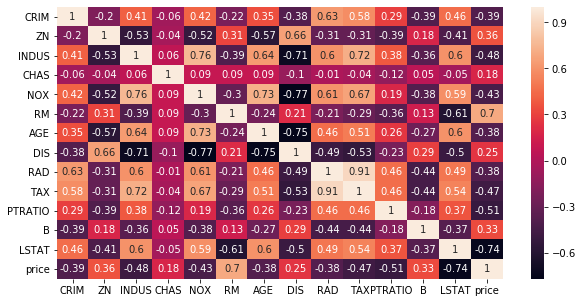

In [67]:
correlation_matrix=data_boston.corr().round(2)
plt.figure(figsize = (10,5))

sns.heatmap(data=correlation_matrix,annot=True)

In [68]:
x_RM=data_boston['RM']
x_LSTAT=data_boston['LSTAT']
y=data_boston['price']

Text(0, 0.5, 'price')

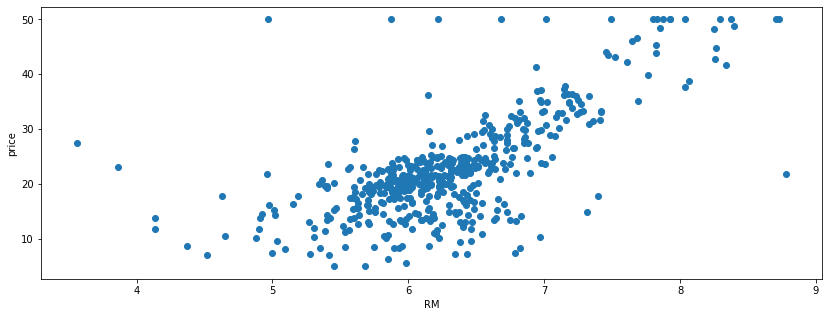

In [69]:
plt.figure(figsize=(14,5))
plt.scatter(x_RM,y)
plt.xlabel('RM')
plt.ylabel('price')

Text(0, 0.5, 'price')

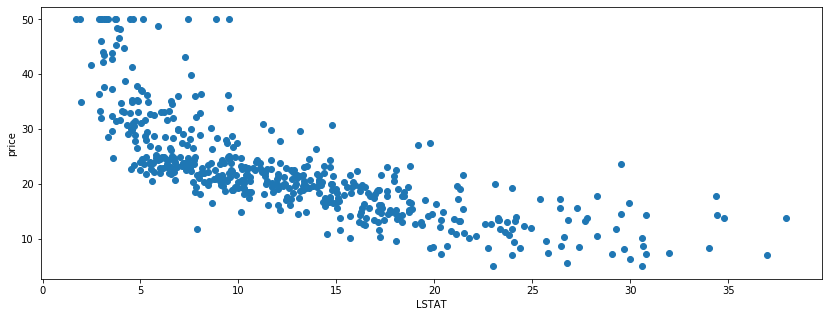

In [70]:
plt.figure(figsize=(14,5))
plt.scatter(x_LSTAT,y)
plt.xlabel('LSTAT')
plt.ylabel('price')

In [71]:
data_con=np.c_[data_boston['RM'],data_boston['LSTAT']]

In [72]:
type(data_con)

numpy.ndarray

In [73]:
data_con.shape

(506, 2)

In [74]:
x_val=pd.DataFrame(data=data_con,columns=['RM','LSTAT'])
y_val=data_boston['price']

In [75]:
x_val.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [76]:
type(x_val['RM'])

pandas.core.series.Series

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_val,y_val,test_size=0.2)


In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [81]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred=lin_model.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error
e=mean_squared_error(y_test,y_pred)

In [90]:
rmse=np.sqrt(e)

In [91]:
rmse

7.095847118052602

In [93]:
x_val.columns

AttributeError: 'Index' object has no attribute 'count'